In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from preprocessing import *
from sklearn.metrics import mean_squared_error


In [5]:
def plotSimulations(pathExp, pathSim, pathGA, simCurves, GACurves):
    plt.figure(figsize=(20,12))
    # The simulation curves from DAMASK are in true stress-true strain
    # preprocess them into flow curves in order to compare with the experimental curve
    loaded_data = np.load('initial_simulations.npy', allow_pickle=True)
    simulatedCurves = loaded_data.tolist()
    #print(simulatedCurves.values())
    '''
    for i in simCurves:
        trueStress, trueStrain, truePlasticStrain = preprocess(f'{pathSim}/{i}/postProc/RVE_1_40_D_tensionX.txt')
        plt.plot(truePlasticStrain, trueStress, c='orange', alpha=0.2)
    plt.plot(truePlasticStrain, trueStress, label = f"Initial simulations x30",c='orange', alpha=0.2)
    '''
    # y = np.array([stress for (strain, stress) in simulatedCurves.values()])
    i = 0
    for curve in simulatedCurves.values():
        trueStress = curve[1]
        truePlasticStrain = curve[0]
        i+= 1
        plt.plot(truePlasticStrain, trueStress, c='orange', alpha=0.2)
    plt.plot(truePlasticStrain, trueStress, label = f"Initial simulations x30",c='orange', alpha=0.2)

    loaded_data = np.load('simulations.npy', allow_pickle=True)
    simulatedCurves = loaded_data.tolist()
    #print(simulatedCurves.values())
    '''
    for i in simCurves:
        trueStress, trueStrain, truePlasticStrain = preprocess(f'{pathSim}/{i}/postProc/RVE_1_40_D_tensionX.txt')
        plt.plot(truePlasticStrain, trueStress, c='orange', alpha=0.2)
    plt.plot(truePlasticStrain, trueStress, label = f"Initial simulations x30",c='orange', alpha=0.2)
    '''
    # y = np.array([stress for (strain, stress) in simulatedCurves.values()])
    i = 0
    print(list(simulatedCurves.keys()))
    for curve in simulatedCurves.values():

        trueStress = curve[1]
        truePlasticStrain = curve[0]
        i+= 1
        if i >=31: 
            plt.plot(truePlasticStrain, trueStress, label = f"Iteration {i}")
    print(len(simulatedCurves.values()))
    stressSim = trueStress
    strainSim = truePlasticStrain
    
    '''
    for i in GACurves:
        trueStress, trueStrain, truePlasticStrain = preprocess(f'{pathGA}/{i}/postProc/RVE_1_40_D_tensionX.txt')
        plt.plot(truePlasticStrain, trueStress, label = f"Iteration {i - 30}")
    # This exp curve should be the flow curve (true stress-true plastic strain)
    '''
    
    df = pd.read_csv(pathExp)
    stressExp = df["Stress MPA"]
    strainExp = df["True Plastic Strain"]
    plt.plot(strainExp, stressExp, label = f"Experiment")
    
    # Making the simulation curve and experiment curve share the same x-values, by interpolation 
    # of simulation strain on the experimental curve
    prune = np.logical_and(strainSim >= 0.002, strainSim <= strainExp.max())
    '''
    print("Simulated strain")
    print(strainSim)
    print(strainPrune.size)
    print(strainSim.loc[0 : strainPrune.size - 1])
    print("\n")
    print("Experimental strain")
    print(strainExp)
    print(strainExp.max() == strainSim.max())
    print(strainExp.min() == strainSim.min())
    print("\n")
    print("Prune strain is")
    print(strainPrune)
    '''
    strainPrune = strainSim[prune]

    
    func = interp1d(strainExp, stressExp)
    interpolatedExpStress = func(strainPrune)
    print(strainPrune)
    interpolatedSimStress = stressSim[prune]
    loss = mean_squared_error(interpolatedSimStress, interpolatedExpStress)
    print(loss)
    # plt.plot(strainPrune, interpolatedExpStress, label = f"Experiment", color = 'black')
    # Uncomment these lines to have a closer view
    plt.xlim([0,0.02])
    plt.ylim([100,160])
    #plt.vlines(strain[0].max(), 0, 1100, linestyle='dotted')
    plt.legend()
    plt.show()
    return prune, interpolatedExpStress


[(80, 114, 1580, 1.7), (80, 575, 1705, 2.6), (53, 436, 500, 3.0), (60, 623, 3395, 2.1), (80, 998, 2375, 2.0), (25, 618, 3755, 2.6), (38, 899, 2655, 2.4), (39, 144, 1775, 1.0), (23, 686, 2035, 2.3), (84, 465, 130, 2.6), (88, 106, 3480, 1.1), (32, 762, 2290, 1.1), (65, 445, 4195, 2.8), (29, 537, 505, 2.1), (72, 156, 3310, 2.7), (28, 419, 2655, 2.7), (27, 662, 3725, 1.8), (73, 953, 4595, 3.0), (64, 444, 2300, 1.5), (43, 536, 3980, 2.1), (43, 544, 2435, 1.0), (73, 381, 2275, 2.4), (96, 238, 3415, 1.1), (74, 874, 3725, 1.3), (92, 310, 250, 1.5), (55, 907, 360, 1.0), (70, 649, 1725, 1.0), (25, 977, 320, 2.4), (63, 106, 3180, 2.7), (58, 700, 820, 3.0), (58.0, 170.0, 250.0, 1.2000000000000002), (56.0, 130.0, 850.0, 1.2000000000000002), (57.0, 140.0, 850.0, 1.4000000000000004), (55.0, 120.0, 1000.0, 1.1), (55.0, 120.0, 1150.0, 1.2000000000000002), (56.0, 190.0, 400.0, 1.3000000000000003), (57.0, 120.0, 550.0, 1.1)]
37
[0.00210904 0.00229979 0.00249133 0.00268351 0.00287619 0.00306929
 0.0127989

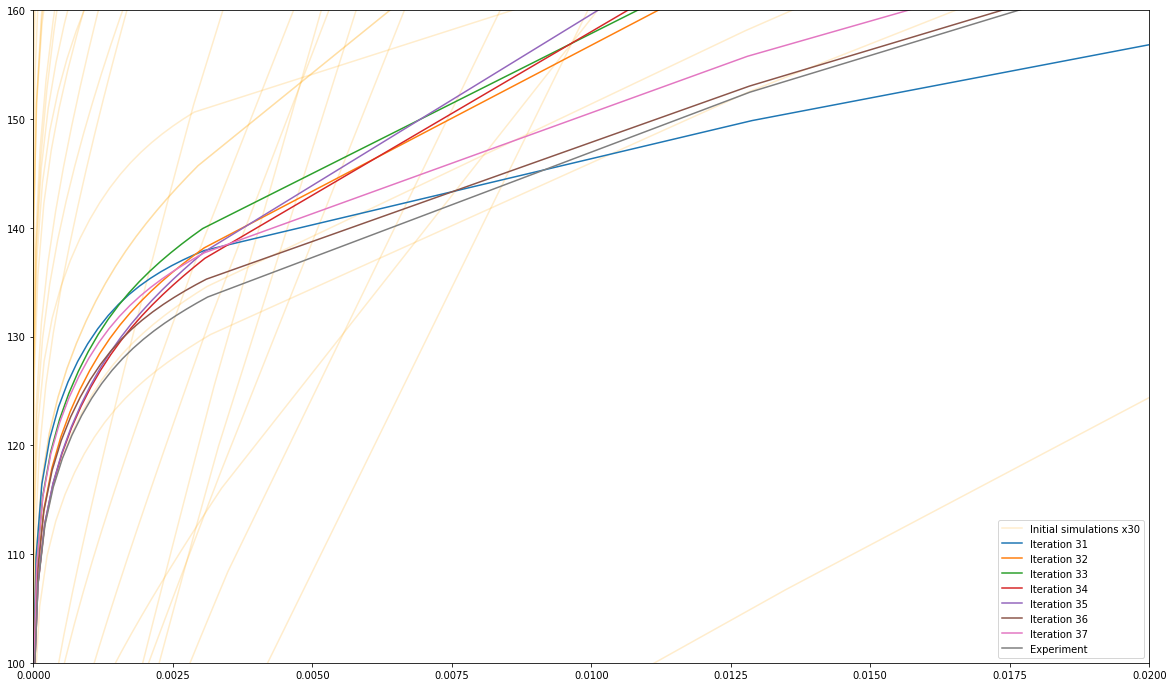

In [6]:
pathSim = "simulations"
pathExp = "target_flowcurve.csv"
pathGA = "simulations"

simCurves = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
GACurves = [36]
prune, exp_stress = plotSimulations(pathExp, pathSim, pathGA, simCurves, GACurves)

## Plot fitness for the curves

In [85]:
# D1 loss function: L2 loss 
plt.rc('font', size=20)          # controls default text sizes

def D1(exp_stress, sim_stress): 
    return np.sqrt(np.sum(np.square(exp_stress - sim_stress))/np.sum(np.square(exp_stress)))

def D2(exp_stress, sim_stress, strainobj): # Added strainobj as an input
    exp_stress_d1 = np.diff(exp_stress)/np.diff(strainobj)  
    sim_stress_d1 = np.diff(sim_stress)/np.diff(strainobj)
    return np.sqrt(np.sum(np.square(sim_stress_d1 - exp_stress_d1))/np.sum(np.square(exp_stress_d1)))

def D3(exp_stress, sim_stress):
    return np.max(np.sqrt(np.square(exp_stress - sim_stress)/sum(np.square(exp_stress))))

def D4(exp_stress, sim_stress, strainobj):
    exp_stress_d1 = np.diff(exp_stress)/np.diff(strainobj)
    sim_stress_d1 = np.diff(sim_stress)/np.diff(strainobj)
    return np.max(np.sqrt(np.square(sim_stress_d1 - exp_stress_d1)/np.sum(np.square(exp_stress_d1))))

def fitness(exp_stress, sim_stress,strainobj, w1, w2, w3, w4):
    return ( w1*D1(exp_stress, sim_stress) + w2*D2(exp_stress, sim_stress, strainobj) 
            + w3*D3(exp_stress, sim_stress) + w4*D4(exp_stress, sim_stress, strainobj))

# Testing on every index of sigma_hats
resD1 = []
resD2 = []
resD3 = []
resD4 = []
res_fit = []
w1 = 0.9
w2 = 0.005
w4 = 0.009
w3 = 1 - w1 - w2 - w4

# Please change this manually
numberOfGen = 5

# Fix this labels for the correct number of generations
labels = ['1st Iteration', '2nd Iteration', '3rd Iteration', '4th Iteration','5th Iteration']

# labels = ['1st Generation', '2nd Generation']

loaded_data = np.load('simulations.npy', allow_pickle=True)
simulatedCurves = loaded_data.tolist()
i = 0
for curve in simulatedCurves.values():
    sim_stress = curve[1][prune]
    sim_strain = curve[0][prune]
    i+= 1
    if i >=31: 
        resD1.append(D1(exp_stress, sim_stress))
        resD2.append(D2(exp_stress, sim_stress, sim_strain))
        resD3.append(D3(exp_stress, sim_stress))
        resD4.append(D4(exp_stress, sim_stress, sim_strain))
        res_fit.append(fitness(exp_stress, sim_stress, sim_strain, w1, w2, w3, w4))

'''
for i in GACurves:
    df = pd.read_csv(f'{pathGA}/{i}/postProc/RVE_1_40_D_tensionX.txt', skiprows = 6, delimiter = "\t")
    sim_stress = df["Mises(Cauchy)"].loc[0: exp_strain.size - 1]
    sim_strain = df["Mises(ln(V))"].loc[0: exp_strain.size - 1]
    resD1.append(D1(exp_stress, sim_stress))
    resD2.append(D2(exp_stress, sim_stress, sim_strain))
    resD3.append(D3(exp_stress, sim_stress))
    resD4.append(D4(exp_stress, sim_stress, sim_strain))
    res_fit.append(fitness(exp_stress, sim_stress, sim_strain, w1, w2, w3, w4))
'''

print("D1 is: ")
print(resD1)
print("D2 is: ")
print(resD2)
print("D3 is: ")
print(resD3)
print("D4 is: ")
print(resD4)

width = 0.55       # the width of the bars: can also be len(x) sequence
L1 = np.array(resD1)[-numberOfGen:]*w1
L2 = np.array(resD2)[-numberOfGen:]*w2
L3 = np.array(resD3)[-numberOfGen:]*w3
L4 = np.array(resD4)[-numberOfGen:]*w4

print("L1 is: ")
print(resD1)
print("L2 is: ")
print(resD2)
print("L3 is: ")
print(resD3)
print("L4 is: ")
print(resD4)

D1 is: 
[0.07147998542026092, 0.15660949281331238, 0.06126937795009333, 0.06443302460905814, 0.041917168685152016]
D2 is: 
[0.1854390924148476, 0.21104052278370994, 0.1527533202030818, 0.16042380087274172, 0.048712518935064]
D3 is: 
[0.018656942056803672, 0.044257387402404286, 0.01700544439583577, 0.017679897389355468, 0.00957479236508546]
D4 is: 
[0.07409476061452044, 0.09595359718225656, 0.05709777006045009, 0.059576734121057386, 0.025168236995207174]
L1 is: 
[0.07147998542026092, 0.15660949281331238, 0.06126937795009333, 0.06443302460905814, 0.041917168685152016]
L2 is: 
[0.1854390924148476, 0.21104052278370994, 0.1527533202030818, 0.16042380087274172, 0.048712518935064]
L3 is: 
[0.018656942056803672, 0.044257387402404286, 0.01700544439583577, 0.017679897389355468, 0.00957479236508546]
L4 is: 
[0.07409476061452044, 0.09595359718225656, 0.05709777006045009, 0.059576734121057386, 0.025168236995207174]


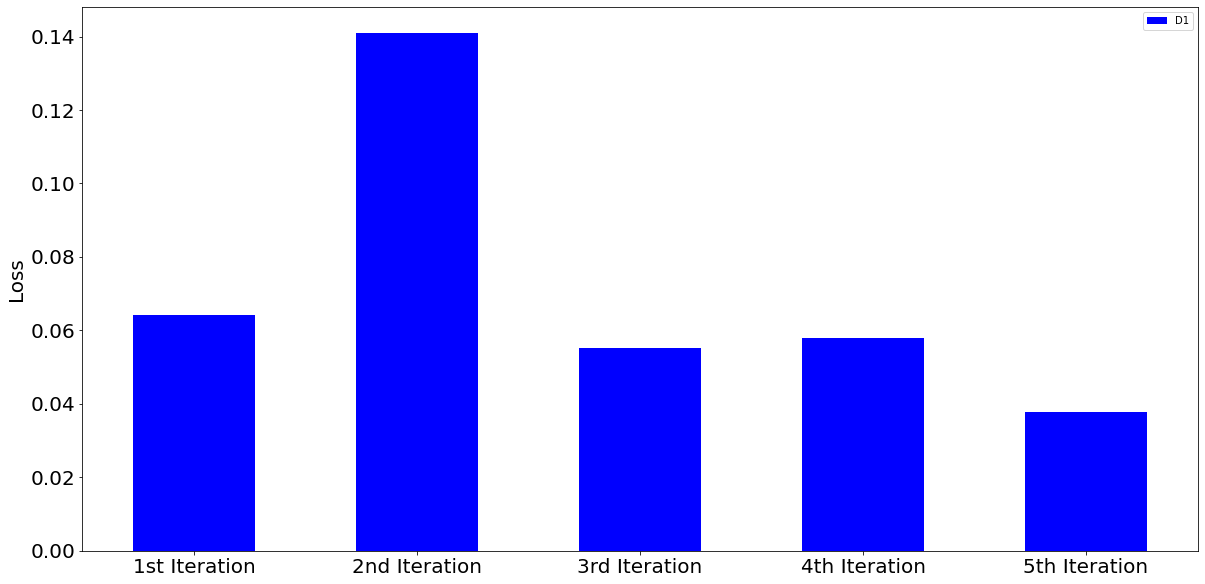

In [86]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(labels, L1, width, label='D1', color = "blue")
ax.set_ylabel('Loss',size=20)
ax.legend(prop={'size': 10})
plt.show()

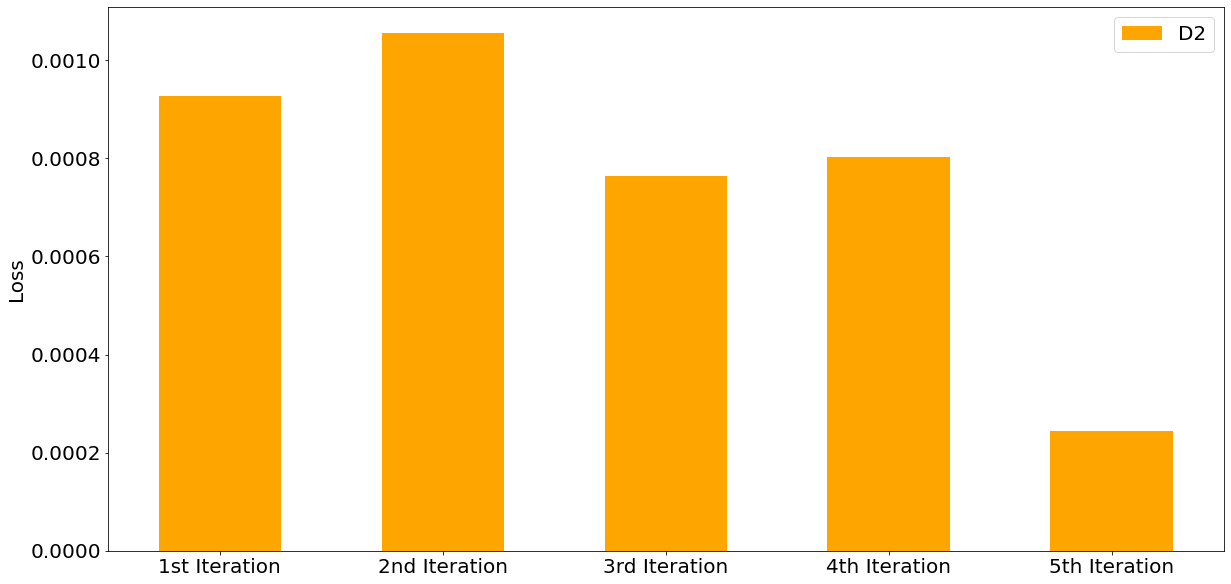

In [87]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(labels, L2, width, label='D2', color = "orange")
ax.set_ylabel('Loss',size=20)
ax.legend(prop={'size': 20})
plt.show()

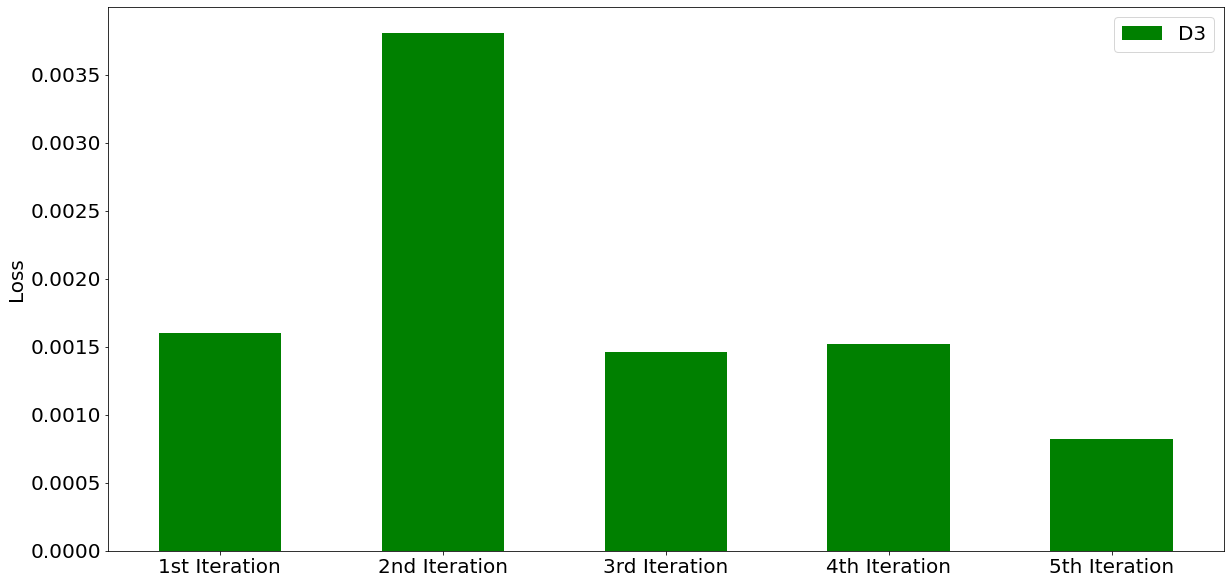

In [88]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(labels, L3, width, label='D3', color = "green")
ax.set_ylabel('Loss',size=20)
ax.legend(prop={'size': 20})
plt.show()

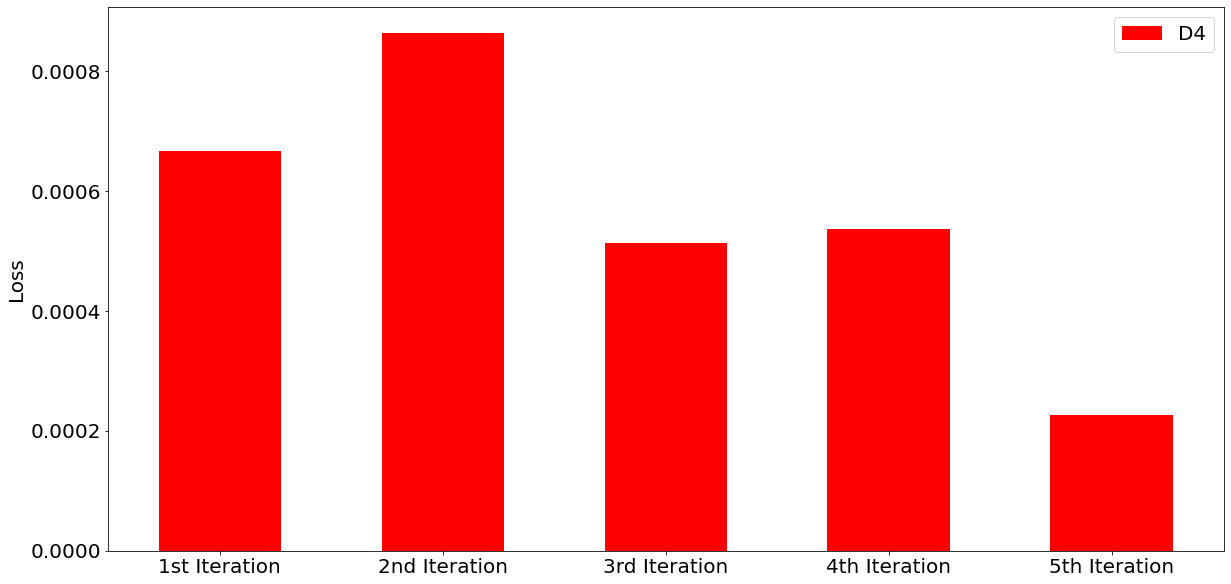

In [89]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(labels, L4, width, label='D4', color = "red")
ax.set_ylabel('Loss',size=20)
ax.legend(prop={'size': 20})
plt.show()

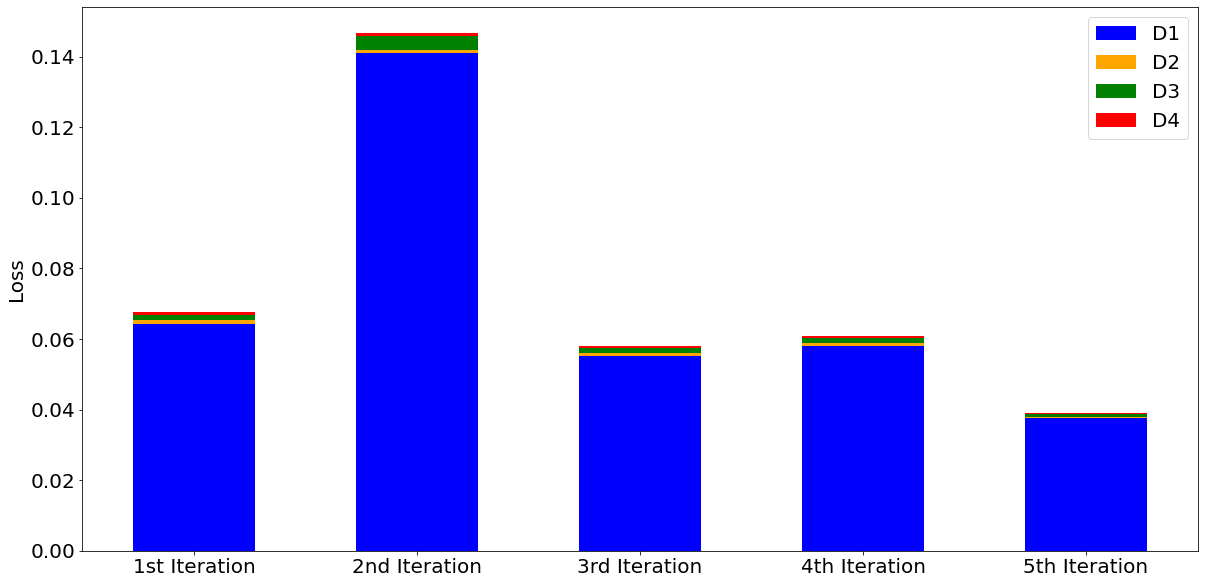

In [90]:
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(labels, L1, width, label='D1', color = "blue")
ax.bar(labels, L2, width, bottom=L1 , label='D2', color = "orange")
ax.bar(labels, L3, width, bottom=L1+L2, label='D3', color = "green")
ax.bar(labels, L4, width, bottom=L1+L2+L3, label='D4', color = "red")

#plt.hlines(res_fit[2], xmin=-0.55, xmax=4.55, linestyles='dashed')
ax.set_ylabel('Loss',size=20)
ax.legend(prop={'size': 20})
plt.show()

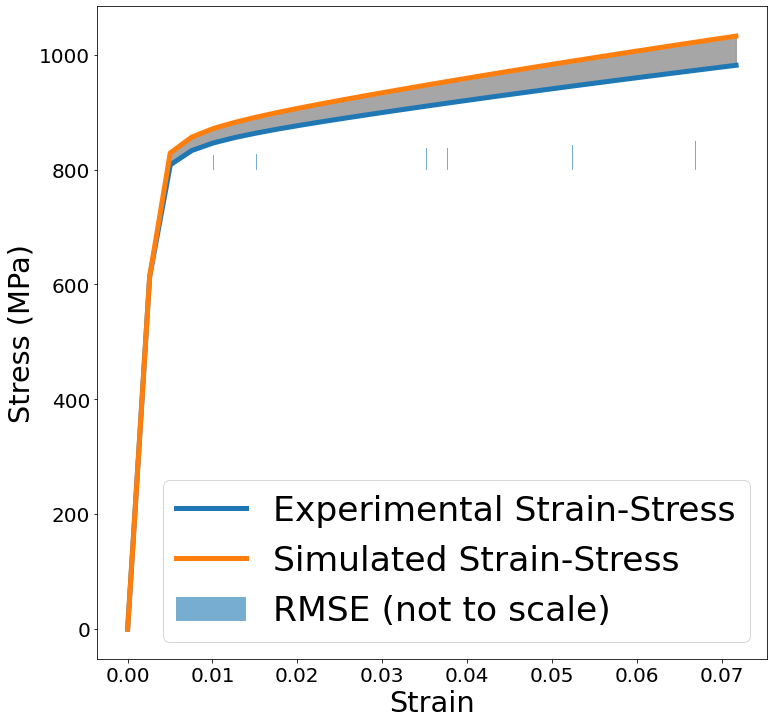

In [20]:
def D1_local(exp_stress, sim_stress): # 
    return np.square(exp_stress-sim_stress)
finalGen = 4
df = pd.read_csv(f'{pathGA}/{4}/postProc/512grains512_tensionX.txt', skiprows = 6, delimiter = "\t")
sim_stress = df["Mises(Cauchy)"].loc[0: exp_strain.size - 1]
sim_strain = df["Mises(ln(V))"].loc[0: exp_strain.size - 1]
    
    
plt.figure(figsize=(12,12))
plt.plot(exp_strain, exp_stress, linewidth=5, label="Experimental Strain-Stress")
plt.plot(sim_strain, sim_stress,  linewidth=5, label="Simulated Strain-Stress")
plt.fill_between(sim_strain, exp_stress, sim_stress, color='grey', alpha=0.7)
plt.bar(exp_strain, np.sqrt(D1_local(exp_stress, sim_stress)), width= exp_strain - sim_strain, align='edge', bottom=800, alpha=0.6, label="RMSE (not to scale)"),
plt.xlabel("Strain",fontsize='x-large')
plt.ylabel("Stress (MPa)",fontsize='x-large')
plt.legend(fontsize='xx-large')